In [3]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98% test accuracy after 5 epochs
'''

from __future__ import print_function
import tensorflow.contrib.keras as keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

batch_size = 200
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.5769 - acc: 0.7891 - val_loss: 0.4314 - val_acc: 0.8375
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3843 - acc: 0.8580 - val_loss: 0.4325 - val_acc: 0.8372
Epoch 3/5
60000/60000 [================

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [43]:
(x_train_, y_train_), (x_test_, y_test_) = fashion_mnist.load_data()
labels = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Prediction: Sneaker
Label: Sneaker


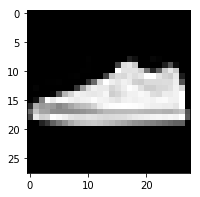

In [48]:
randomDigit = random.randint(0,len(x_test))
clothing = np.array([x_test[randomDigit]])
prediction = model.predict_classes(clothing)
print("Prediction:",labels[prediction[0]])
print("Label:", labels[y_test_[randomDigit]])

# Display
# change size of plot
plt.rcParams['figure.figsize'] = (3.0, 3.0)
plt.imshow(np.reshape(clothing, [28, 28]), cmap='gray')
plt.show()